**Data Analysis**
*   Problem Formulation
*   Data Collection
*   Data Preparation
*   Exploratory Data Analysis (EDA)

*  Model Building

* Model Evaluation


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_csv("/content/IMDB - IMDB Top 250 Movies - IMDB Top 250 Movies (1).csv")

In [24]:
df.head()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2.22,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"
1,2,The Godfather,1972,9.2,"Crime,Drama",R,2.55,An offer you can't refuse.,6000000,250341816,"Marlon Brando,Al Pacino,James Caan,Diane Keato...",Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola"
2,3,The Dark Knight,2008,9.0,"Action,Crime,Drama",PG-13,2.32,Why So Serious?,185000000,1006234167,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich...",Christopher Nolan,"Jonathan Nolan,Christopher Nolan,David S. Goyer"
3,4,The Godfather Part II,1974,9.0,"Crime,Drama",R,3.22,All the power on earth can't change destiny.,13000000,47961919,"Al Pacino,Robert De Niro,Robert Duvall,Diane K...",Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo"
4,5,12 Angry Men,1957,9.0,"Crime,Drama",Approved,1.36,Life Is In Their Hands -- Death Is On Their Mi...,350000,955,"Henry Fonda,Lee J. Cobb,Martin Balsam,John Fie...",Sidney Lumet,Reginald Rose


In [25]:
df.tail()

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
245,246,The Help,2011,8.1,Drama,PG-13,2.26,Change begins with a whisper.,25000000,216639112,"Viola Davis,Emma Stone,Octavia Spencer,Bryce D...",Tate Taylor,"Tate Taylor,Kathryn Stockett"
246,247,Dersu Uzala,1975,8.2,"Adventure,Biography,Drama",G,2.22,There is man and beast at nature's mercy. Ther...,4000000,14480,"Maksim Munzuk,Yuriy Solomin,Mikhail Bychkov,Vl...",Akira Kurosawa,"Akira Kurosawa,Yuriy Nagibin,Vladimir Arsenev"
247,248,Aladdin,1992,8.0,"Animation,Adventure,Comedy",G,1.30,Wish granted! (DVD re-release),0,0,"Scott Weinger,Robin Williams,Linda Larkin,Jona...","Ron Clements,John Musker","Ron Clements,John Musker,Ted Elliott"
248,249,Gandhi,1982,8.0,"Biography,Drama,History",PG,3.11,His Triumph Changed The World Forever.,22000000,52767889,"Ben Kingsley,John Gielgud,Rohini Hattangadi,Ro...",Richard Attenborough,John Briley
249,250,Dances with Wolves,1990,8.0,"Adventure,Drama,Western",PG-13,3.10,Inside everyone is a frontier waiting to be di...,22000000,424208848,"Kevin Costner,Mary McDonnell,Graham Greene,Rod...",Kevin Costner,Michael Blake


In [26]:
#Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    float64
 7   tagline      250 non-null    object 
 8   budget       250 non-null    int64  
 9   box_office   250 non-null    int64  
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


In [27]:
#Describe the data
df.describe()

,rank,year,rating,run_time,budget,box_office
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,2.500000e+02
mean,125.500000,1986.360000,8.307200,2.203000,4.384599e+07,2.067740e+08
std,72.312977,25.125356,0.229081,2.778979,1.625993e+08,3.653296e+08
min,1.000000,1921.000000,8.000000,0.000000,0.000000e+00,0.000000e+00
25%,63.250000,1966.250000,8.100000,1.482500,1.200000e+06,5.375080e+05
50%,125.500000,1994.000000,8.200000,2.125000,9.750000e+06,4.603973e+07
75%,187.750000,2006.000000,8.400000,2.400000,3.287500e+07,2.637577e+08
max,250.000000,2022.000000,9.300000,45.000000,2.400000e+09,2.799439e+09


In [28]:
top_rates=df.groupby('genre').mean().sort_values('rating',ascending=False)
top_rates = top_rates[['rating']].round(2)
top_rates.reset_index(inplace=True)
top_rates

,genre,rating
0,"Adventure,Western",8.8
1,"Action,Adventure,Drama",8.7
2,"Adventure,Drama,Sci-Fi",8.6
3,"Drama,Family,Fantasy",8.6
4,"Crime,Drama,Fantasy",8.6
...,...,...
99,"Adventure,Drama",8.1
100,"Adventure,Family,Fantasy",8.1
101,"Biography,Drama,Family",8.1
102,"Drama,Fantasy",8.1


In [29]:
df['genre'].unique()

array(['Drama', 'Crime,Drama', 'Action,Crime,Drama',
       'Biography,Drama,History', 'Action,Adventure,Drama',
       'Adventure,Western', 'Drama,Romance', 'Action,Adventure,Sci-Fi',
       'Action,Adventure,Fantasy', 'Action,Sci-Fi',
       'Biography,Crime,Drama', 'Crime,Drama,Mystery', 'Action,Drama',
       'Drama,Family,Fantasy', 'Crime,Drama,Thriller', 'Drama,War',
       'Adventure,Drama,Sci-Fi', 'Comedy,Drama,Romance',
       'Crime,Drama,Fantasy', 'Adventure,Comedy,Sci-Fi',
       'Animation,Adventure,Family', 'Biography,Drama,Music',
       'Horror,Mystery,Thriller', 'Drama,Thriller',
       'Animation,Adventure,Drama', 'Drama,Mystery,Sci-Fi', 'Drama,Music',
       'Drama,Romance,War', 'Animation,Drama,War', 'Action,Drama,Mystery',
       'Biography,Comedy,Drama', 'Western', 'Mystery,Thriller',
       'Horror,Sci-Fi', 'Drama,Mystery,War', 'Drama,Western',
       'Action,Adventure', 'Drama,Mystery,Thriller', 'Drama,Film-Noir',
       'Drama,Horror', 'Comedy,Drama,War', 'Anim

In [30]:
print(df['rating'].describe())

count    250.000000
mean       8.307200
std        0.229081
min        8.000000
25%        8.100000
50%        8.200000
75%        8.400000
max        9.300000
Name: rating, dtype: float64


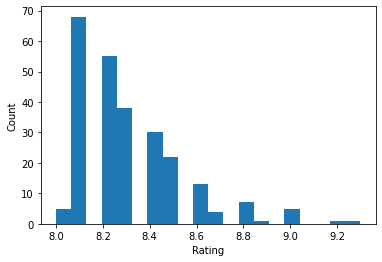

In [31]:
#Histogram
plt.hist(df['rating'], bins=20)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


# We can see that the ratings are normally distributed, with a mean of around 7.0 and a standard deviation of around 1.4.

In [32]:
top_movies = df.groupby('year').apply(lambda x: x[x['rating'] == x['rating'].max()])

print(top_movies[['year', 'name', 'rating']])

# Table of the top-rated movie for each year, sorted by year.



          year               name  rating
year                                     
1921 127  1921            The Kid     8.3
1924 194  1924       Sherlock Jr.     8.2
1925 176  1925      The Gold Rush     8.1
1926 186  1926        The General     8.1
1927 114  1927         Metropolis     8.3
...        ...                ...     ...
2018 87   2018          Capernaum     8.4
2019 33   2019           Parasite     8.5
2020 107  2020           Hamilton     8.4
2021 233  2021           Jai Bhim     8.8
2022 105  2022  Top Gun: Maverick     8.3

[100 rows x 3 columns]


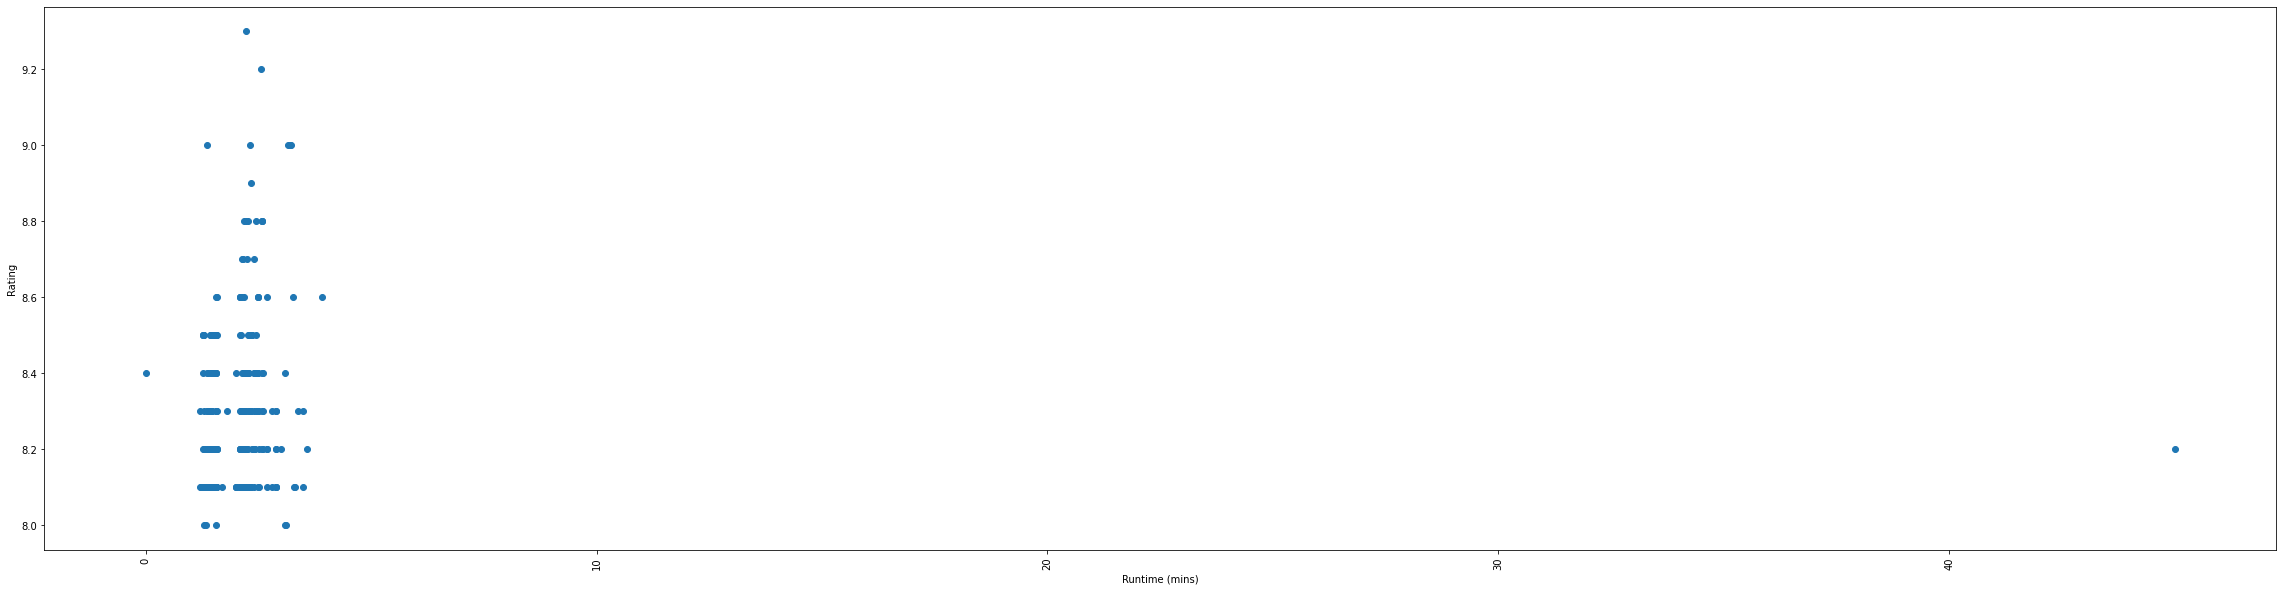

In [33]:
plt.figure(figsize=(40, 10))

plt.scatter(df['run_time'], df['rating'])
plt.xlabel('Runtime (mins)')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()

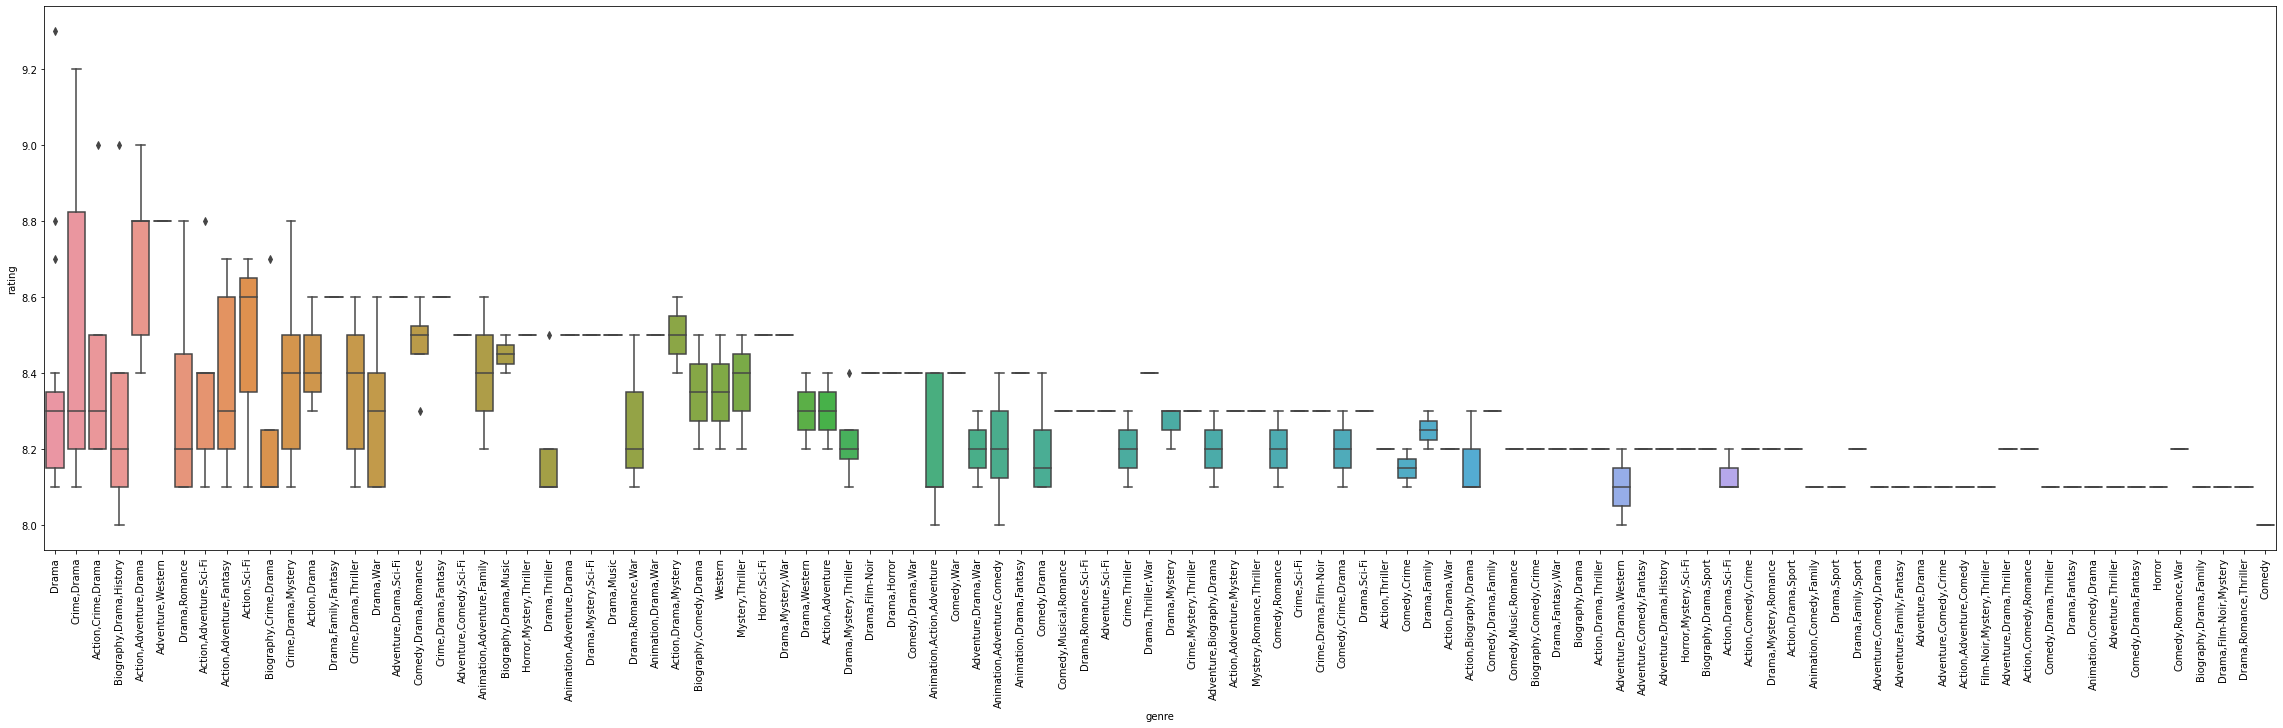

In [34]:
plt.figure(figsize=(40, 10))
sns.boxplot(x='genre', y='rating', data=df)
plt.xticks(rotation=90)
plt.show()

# Box plot of the ratings by genre.

In [35]:
# Group the movies by director and find the top-rated directors:
top_directors = df.groupby('directors').mean().sort_values('rating', ascending=False).head(20)

print(top_directors)

                                                  rank         year    rating  \
directors                                                                       
Frank Darabont                               14.000000  1996.500000  8.950000   
Francis Ford Coppola                         19.666667  1975.000000  8.900000   
Peter Jackson                                 9.666667  2002.000000  8.866667   
T.J. Gnanavel                               234.000000  2021.000000  8.800000   
Irvin Kershner                               15.000000  1980.000000  8.700000   
Lana Wachowski,Lilly Wachowski               16.000000  1999.000000  8.700000   
Robert Zemeckis                              20.500000  1989.500000  8.650000   
Fernando Meirelles,Kátia Lund(co-director)   23.000000  2002.000000  8.600000   
George Lucas                                 28.000000  1977.000000  8.600000   
Masaki Kobayashi                             45.000000  1962.000000  8.600000   
Jonathan Demme              

In [36]:
movies=df['name'].tolist()

In [37]:
movies

['The Shawshank Redemption',
 'The Godfather',
 'The Dark Knight',
 'The Godfather Part II',
 '12 Angry Men',
 "Schindler's List",
 'The Lord of the Rings: The Return of the King',
 'Pulp Fiction',
 'The Lord of the Rings: The Fellowship of the Ring',
 'The Good, the Bad and the Ugly',
 'Forrest Gump',
 'Fight Club',
 'The Lord of the Rings: The Two Towers',
 'Inception',
 'Star Wars: Episode V - The Empire Strikes Back',
 'The Matrix',
 'Goodfellas',
 "One Flew Over the Cuckoo's Nest",
 'Se7en',
 'Seven Samurai',
 "It's a Wonderful Life",
 'The Silence of the Lambs',
 'City of God',
 'Saving Private Ryan',
 'Interstellar',
 'Life Is Beautiful',
 'The Green Mile',
 'Star Wars: Episode IV - A New Hope',
 'Terminator 2: Judgment Day',
 'Back to the Future',
 'Spirited Away',
 'The Pianist',
 'Psycho',
 'Parasite',
 'Léon: The Professional',
 'The Lion King',
 'Gladiator',
 'American History X',
 'The Departed',
 'The Usual Suspects',
 'The Prestige',
 'Whiplash',
 'Casablanca',
 'Grave o

In [38]:
tagline=df['tagline'].tolist()

In [39]:
for i in range(250):
  movie=movies[i]
  if movie=="The Truman Show":
    print(tagline[i])

All the world's a stage...


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rank         250 non-null    int64  
 1   name         250 non-null    object 
 2   year         250 non-null    int64  
 3   rating       250 non-null    float64
 4   genre        250 non-null    object 
 5   certificate  250 non-null    object 
 6   run_time     250 non-null    float64
 7   tagline      250 non-null    object 
 8   budget       250 non-null    int64  
 9   box_office   250 non-null    int64  
 10  casts        250 non-null    object 
 11  directors    250 non-null    object 
 12  writers      250 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 25.5+ KB


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:

# Select the features and target variable
X = df[['budget', 'run_time']]
y = df['rating']

# Fit the linear regression model
model = LinearRegression().fit(X, y)


In [43]:
# Predict the rating of a new movie with a budget of $50 million and runtime of 120 minutes
new_movie = [[50000000, 2.30]]
predicted_rating = model.predict(new_movie)

print('Predicted rating:', predicted_rating)

Predicted rating: [8.30788987]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
